<a href="https://colab.research.google.com/github/Leo270499/Apuntes/blob/main/Data_StoryTelling_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHURN:** Desentrañando el Desempleo Voluntario - *Un Análisis de las Tasas de Desempleo y el Abandono Laboral*

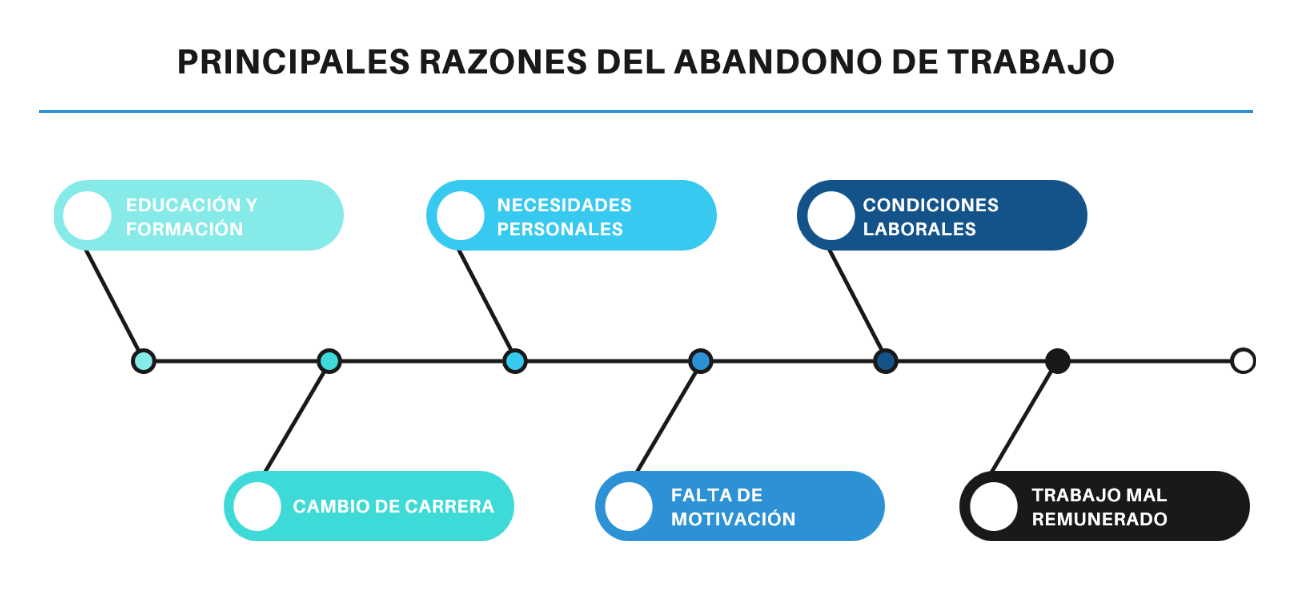

## **1. Introduction**

### **1.1. Abstract**
En la era actual de la información y la tecnología, las empresas se encuentran inmersas en un entorno empresarial cada vez más competitivo. La retención de talento y la gestión eficaz de los recursos humanos se han convertido en factores críticos para el éxito y la sostenibilidad de cualquier organización. El abandono de empleados, o la pérdida de personal clave, puede tener un impacto devastador en la productividad y la rentabilidad de una empresa.

El objetivo de este estudio es utilizar algoritmos de machine learning con el fin de crear modelos de clasificación que me permita predecir el abandono de empleados de una empresa. A través de esto, se podrá anticipar y abordar las causas de abandono, permitiendo tomar medidas para retener personal valioso y futuros talentos.

### **1.2. Motivation and Audience**
**Motivation**

La motivación detrás de este proyecto de Data Science es abordar uno de los desafíos más urgentes que enfrentan las organizaciones en la actualidad: la retención de talento. La alta rotación de empleados y la pérdida de personal valioso pueden tener un impacto significativo en la estabilidad y el éxito de una empresa.

Este proyecto busca proporcionar a las empresas una herramienta predictiva precisa que les permita tomar medidas proactivas para reducir el abandono de empleados y, en última instancia, mejorar su eficacia y competitividad en el mercado.

**Audience**

Este trabajo está destinado a una audiencia diversa como:

1.	**Profesionales de Recursos Humanos:** Este proyecto proporcionará a los especialistas en recursos humanos una herramienta valiosa para predecir el abandono de la empresa y, en consecuencia, tomar medidas preventivas para retener a los empleados.
2.	**Gerentes y Líderes Empresariales:** Los líderes empresariales pueden beneficiarse de este trabajo al comprender mejor cómo los factores internos y externos pueden afectar la retención de empleados, lo que les permite tomar decisiones estratégicas informadas.
3.	**Data Scientists y Analistas:** Aquellos interesados en el campo de Data Science y Machine Learning encontrarán este proyecto como un ejemplo práctico de cómo aplicar estas técnicas en un contexto empresarial y de recursos humanos.
4.	**Empresas y Organizaciones:** Cualquier entidad interesada en mejorar su retención de empleados y su rendimiento general puede beneficiarse de los conocimientos y modelos desarrollados en este proyecto.

En resumen, este proyecto tiene como objetivo servir como un recurso valioso para cualquier persona o entidad interesada en abordar el desafío del abandono de la empresa desde una perspectiva basada en datos y orientada a la toma de decisiones informadas.


## **2. Hypothesis**

Para esta primera entrega, hago presente 4 hipotesis:

H1. ¿La variable que más influye en el abandono de la empresa de un trabajador es la sastifacción laboral?

H2. ¿La variable que más influye en el abandono de la empresa de un trabajador es la salario mensual?

H3. ¿La variable que más influye en el abandono de la empresa de un trabajador es el bajo salario?

H4. ¿El bajo nivel educativo influira en el abandono de trabajo?

## **3. Theoretical Framework**

### **3.1. Objetive**
El objetivo principal desde este proyecto de ciencia de datos es desarrollar un modelo de clasificación que prediga el abandono laboral de los empleados. Este modelo tiene la finalidad de ayudar a las organizaciones a identificar los factores que contribuyen al abandono y tomar medidas proactivas para retener a su personal y mejorar la retención de empleados.

### **3.2. Business Context**
En el entorno empresarial actual, la retención de empleados es un desafío crucial debido a sus costos, impacto en la productividad y la competencia por el talento. La pérdida de empleados clave puede afectar la continuidad operativa y la reputación de la empresa.

### **3.3. Commercial Issue**
El problema comercial que este proyecto busca abordar es la falta de una herramienta predictiva precisa para prever y reducir el abandono de la empresa. Las organizaciones a menudo enfrentan dificultades para identificar a tiempo a los empleados que están en riesgo de abandonar la empresa, lo que limita su capacidad para tomar medidas preventivas. Esta falta de anticipación puede resultar en costos adicionales y la pérdida de talento valioso.

### **3.4. Analytical Context**
En este proyecto de análisis de datos, se recopilarán y analizarán datos históricos relacionados con el empleo, como satisfacción laboral, rendimiento, antigüedad, compensación y otros factores. Se utilizarán técnicas de Machine Learning y análisis estadístico para crear un modelo que pueda predecir el abandono laboral basado en estos datos.

El enfoque se centra en construir un modelo preciso y descubrir los factores más influyentes en el abandono laboral. También se explorarán métodos para evaluar su efectividad y se considerarán mejoras continuas para mantener su precisión.

## **4. Environment Setup**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Librerias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## **5. Data Acquisition**

In [3]:
PATH1 = "/content/drive/MyDrive/Coderhouse_ Data Science/9. Data StoryTelling (Data Science)/unemployment analysis.csv"
df1 = pd.read_csv(PATH1)
PATH2 = "/content/drive/MyDrive/Coderhouse_ Data Science/6. Primera Entrega (Data Science)/Dataset/Abandono.csv"
df2 = pd.read_csv(PATH2, sep = ';', index_col= 'id', na_values='#N/D')


In [4]:
pd.set_option('display.max_columns', 31)

## **6. Data Wrangling**



In [5]:
#Seleccionamos los paises Latinoamericanos
df1_latam = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela', 'Mexico']

# Lo filtramos
df1_latam = df1[df1['Country Name'].isin(df1_latam)]

# Eliminamos las columnas innecesarias
columns_to_drop = ['Country Code']
df1_latam = df1_latam.drop(columns=columns_to_drop)

# Eliminamos filas con valores nulos
df1_latam = df1_latam.dropna()

# Establece 'Country Name'
df1_latam = df1_latam.set_index('Country Name')

In [6]:
df1_latam["2020"]

Country Name
Argentina    11.46
Bolivia       7.90
Brazil       13.69
Chile        11.18
Colombia     15.04
Ecuador       6.11
Mexico        4.45
Peru          7.18
Paraguay      7.55
Uruguay      10.35
Name: 2020, dtype: float64

## **7. Data Driven I**

### **7.1. Desempleo**
Es la condición en la que las personas dispuestas y capaces de trabajar no encuentran empleo remunerado. Su medición se usa como indicador económico clave.

### **7.2. Una breve vista del desempleo en latinoamerica**

Se obtuvieron los datos de los principales paises de latinoamerica, para los años 1991-2021. Podemos observar los siguientes gráficos:


1.   **Comportamiento de la tasa de desempleo, según el país.** A través de esta pequeña tabla, se puede apreciar cuál fue el peor año para los paises latinoamericanos.
2.   **Comportamiento de la tasa de desempleo peruana respecto a las demás economías.** El cuál presento bajas tasas de desempleo respecto a los demás paises.
3.   **Tasas de desempleo en el año 2020 (covid-19).** Se puede observar a través del primer gráfico que el año 2020 se elvaron las tasas de desempleo, siendo Colombia *(tercer gráfico)* el más perjudicado por el efecto de la pandemia.

In [28]:
# Encuentra el máximo en cada columna y resalta con un color
df1_latam1 = df1_latam.T
df1_latam_max = df1_latam1.style.apply(lambda x: ['background: skyblue' if v == x.max() else '' for v in x], axis=0, subset=df1_latam1.columns[:])

# Muestra el DataFrame con los máximos resaltados
print("Gráfico 1: Comportamiento de las principales economías latinoamericanas")
df1_latam_max

Gráfico 1: Comportamiento de las principales economías latinoamericanas


Country Name,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Mexico,Peru,Paraguay,Uruguay
1991,5.440000,2.960000,6.310000,5.230000,10.120000,4.370000,3.150000,4.560000,5.100000,8.950000
1992,6.360000,3.260000,6.420000,4.350000,9.440000,4.530000,3.240000,4.720000,4.980000,8.960000
1993,10.100000,3.080000,6.030000,4.490000,7.800000,4.560000,3.370000,4.500000,5.060000,8.350000
1994,11.760000,3.080000,6.170000,5.870000,8.250000,4.440000,4.440000,4.250000,4.410000,9.040000
1995,18.800000,2.750000,6.420000,4.700000,8.720000,4.590000,7.100000,4.480000,3.400000,10.020000
1996,17.110000,2.440000,7.250000,7.410000,11.810000,4.650000,5.470000,4.720000,8.150000,11.930000
1997,14.820000,2.080000,8.160000,7.140000,12.140000,4.510000,4.240000,4.590000,5.360000,11.440000
1998,12.650000,2.130000,9.420000,7.310000,15.000000,4.610000,3.730000,4.950000,4.420000,9.360000
1999,14.050000,2.440000,10.210000,11.160000,20.060000,5.180000,2.600000,4.900000,5.340000,10.470000
2000,15.000000,2.380000,9.560000,10.490000,20.520000,4.800000,2.650000,4.880000,7.610000,12.630000


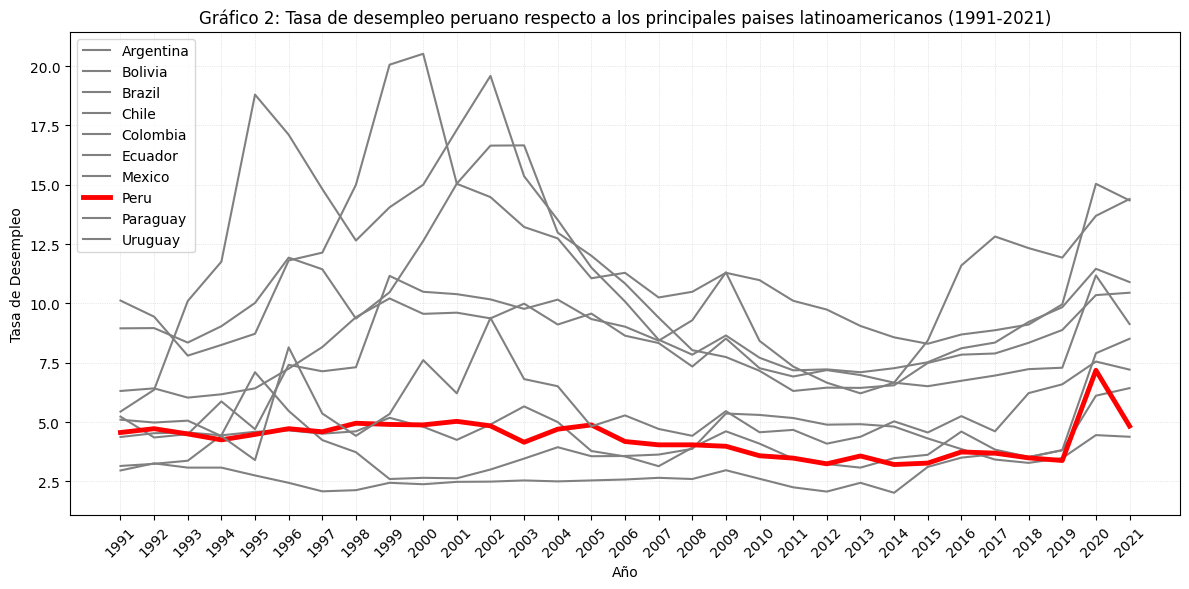

In [9]:
# Serie de Tiempo: Perú respecto a paises latinoamericanos
plt.figure(figsize=(12, 6))

for country in df1_latam1.columns:
    if country == "Peru":
        plt.plot(df1_latam1.index, df1_latam1[country], label=country, color='red', linewidth=3.5)
    else:
        plt.plot(df1_latam1.index, df1_latam1[country], label=country, color='gray')

plt.xlabel('Año')
plt.ylabel('Tasa de Desempleo')
plt.title('Gráfico 2: Tasa de desempleo peruano respecto a los principales paises latinoamericanos (1991-2021)')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='dotted', linewidth=0.5, color='lightgray')
plt.show()

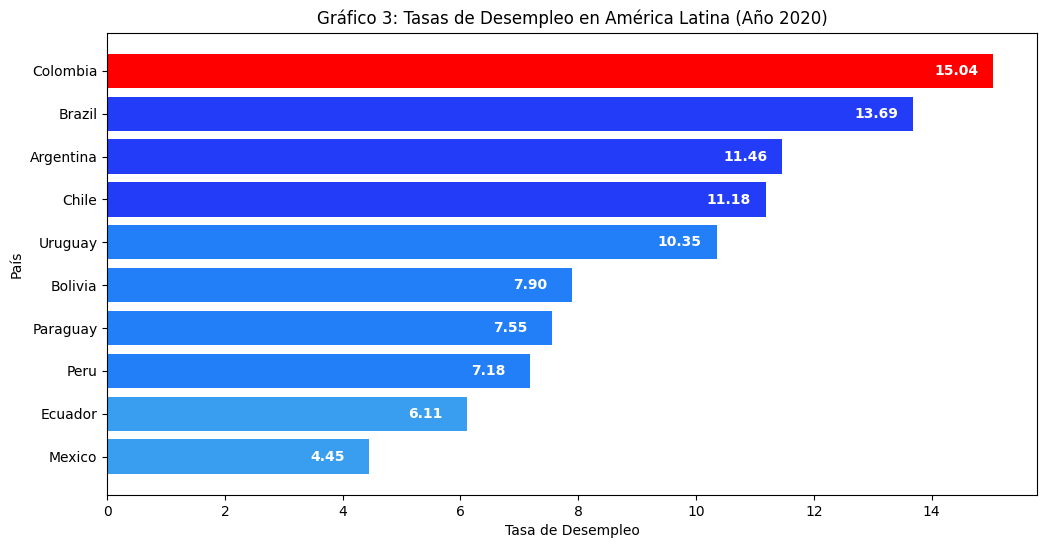

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

tasas_desempleo_2020 = df1_latam["2020"]
tasas_desempleo_2020 = tasas_desempleo_2020.sort_values(ascending=True)

colores = []
for tasa in tasas_desempleo_2020:
    if tasa > 15:
        colores.append("red")
    elif tasa >= 11 and tasa <= 15:
        colores.append('#233CF7')
    elif tasa >= 7 and tasa < 11:
        colores.append('#237FF7')
    else:
        colores.append('#3A9EF0')

plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura
bars = plt.barh(tasas_desempleo_2020.index, tasas_desempleo_2020, color=colores)

for bar, tasa in zip(bars, tasas_desempleo_2020):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height() / 2, f'{tasa:.2f}', ha='left', va='center', color='white', fontweight='bold')

plt.title('Gráfico 3: Tasas de Desempleo en América Latina (Año 2020)')
plt.xlabel('Tasa de Desempleo')
plt.ylabel('País')
plt.show()


    [RESUMEN]
    ["Gráfico 1", "Las economías latinoamericanas en sus peores años pueden llegar a tener tasas de desempleo mmayores a 2 digitos."],
    ["Gráfico 2", "La economía peruana presento bajas tasas de desempleo en general."],
    ["Gráfico 3", "El país que presento la mayor tasa de desempleo por efectos de la pandemia fue Colombia.]

### **7.3. Decisión**
El estudio del desempleo es crucial para medir la salud económica y diseñar políticas que aborden la falta de empleo, promoviendo la prosperidad de la población. Proporciona información esencial para la toma de decisiones.

Por lo tanto, se buscará explicar el desempleo voluntario y sus efectos en la economía a través del dataset que se desarrollará en esta oportunidad.

## **8. Data Driven II**

### **8.1. EDA**